[]


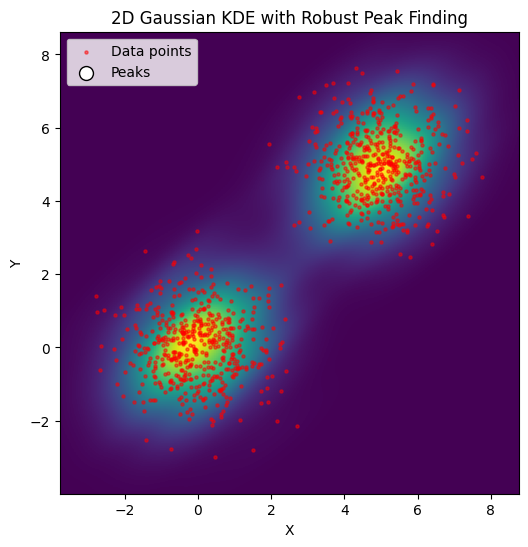

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter, maximum_filter

# Generate sample data
np.random.seed(0)
x = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)])
y = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)])

# Perform KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)
xmin, xmax = x.min() - 1, x.max() + 1
ymin, ymax = y.min() - 1, y.max() + 1
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
kde_values = np.reshape(kde(positions).T, xx.shape)

# Smooth the KDE values for peak finding
sigma = 2  # Standard deviation for Gaussian kernel
kde_values_smooth = gaussian_filter(kde_values, sigma=sigma)

# Find local maxima in the smoothed KDE values
local_max = (kde_values_smooth == maximum_filter(kde_values_smooth, size=20))
peaks_coords = np.argwhere(local_max)

# Apply prominence filtering by comparing peak values with their neighbors
prominence_threshold = 0.1
prominent_peaks = [
    coord for coord in peaks_coords
    if kde_values_smooth[coord[0], coord[1]] - np.min(kde_values_smooth[
        max(0, coord[0]-10):min(coord[0]+10, kde_values_smooth.shape[0]),
        max(0, coord[1]-10):min(coord[1]+10, kde_values_smooth.shape[1])
    ]) > prominence_threshold
]

# Convert peak coordinates to original scale
peaks_x = xx[[peak[0] for peak in prominent_peaks], [peak[1] for peak in prominent_peaks]]
peaks_y = yy[[peak[0] for peak in prominent_peaks], [peak[1] for peak in prominent_peaks]]

print(peaks_x)

# Plot the results
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(kde_values), cmap='viridis', extent=[xmin, xmax, ymin, ymax])
plt.scatter(x, y, s=5, color='red', alpha=0.5, label='Data points')
plt.scatter(peaks_x, peaks_y, color='white', edgecolor='black', s=100, label='Peaks')
plt.title('2D Gaussian KDE with Robust Peak Finding')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


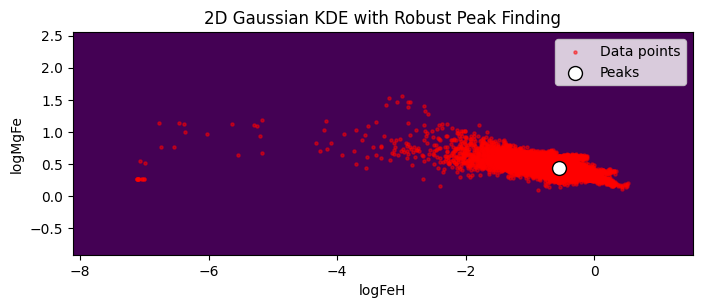

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter, label, find_objects

# Load the dataset
data_path = 'dat.txt'
data = np.loadtxt(data_path)

# Extract logFeH and logMgFe columns
logFeH = data[:, 0]
logMgFe = data[:, 1]

# Perform KDE
data = np.vstack([logFeH, logMgFe])
kde = gaussian_kde(data)
xmin, xmax = logFeH.min() - 1, logFeH.max() + 1
ymin, ymax = logMgFe.min() - 1, logMgFe.max() + 1
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]  # Increased grid resolution
positions = np.vstack([xx.ravel(), yy.ravel()])
kde_values = np.reshape(kde(positions).T, xx.shape)

# Smooth the KDE values for peak finding
sigma = 3  # Increased standard deviation for Gaussian kernel
kde_values_smooth = gaussian_filter(kde_values, sigma=sigma)

# Find local maxima in the smoothed KDE values using connected components
threshold = np.percentile(kde_values_smooth, 99)  # Threshold for peak detection
labeled, num_features = label(kde_values_smooth > threshold)
slices = find_objects(labeled)

# Extract the coordinates of the peaks
peaks_coords = [(int((s[0].start + s[0].stop - 1) / 2), int((s[1].start + s[1].stop - 1) / 2)) for s in slices]

# Convert peak coordinates to original scale
peaks_x = xx[[peak[0] for peak in peaks_coords], [peak[1] for peak in peaks_coords]]
peaks_y = yy[[peak[0] for peak in peaks_coords], [peak[1] for peak in peaks_coords]]

# Plot the results
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(kde_values), cmap='viridis', extent=[xmin, xmax, ymin, ymax])
plt.scatter(logFeH, logMgFe, s=5, color='red', alpha=0.5, label='Data points')
plt.scatter(peaks_x, peaks_y, color='white', edgecolor='black', s=100, label='Peaks')
plt.title('2D Gaussian KDE with Robust Peak Finding')
plt.xlabel('logFeH')
plt.ylabel('logMgFe')
plt.legend()
plt.show()


In [13]:
from findpeaks import findpeaks